## Supervised Learning: Classification tasks


- Reading: Geron, ch. 3 and Tatsat el al. ch. 4

> **Supervised learning** is an area of machine learning where the chosen algorithm tries to fit a *target* using the given *input*.

- A set of training data that contains *labels* is supplied to the algorithm.
- Based on a set of data, the algorithm will learn a rule that it uses to predict the labels for new observations

There are two varieties of supervised learning algorithms: **regression and classification algorithms**.

- Regression-based supervised learning methods try to predict outputs based on input variables.
- Classification-based supervised learning methods identify which category a set of data items belongs to.
- Classification algorithms are probability-based, meaning the outcome is the category for which the algorithm finds the highest probability that the dataset belongs to it. 
- Regression algorithms, in contrast, estimate the outcome of problems that have an infinite number of solutions


In the context of **finance**, supervised learning is perhaps the most favored ML tool:

- Regression-based algorithms have been leveraged by academic and industry researchers to develop numerous *asset pricing* models. These models are used to predict returns over various time periods and to identify significant factors that drive asset returns.

- Classification tasks in finance: fraud detection, default prediction, credit scoring, directional forecast of asset price movement, and Buy/Sell recommendations.

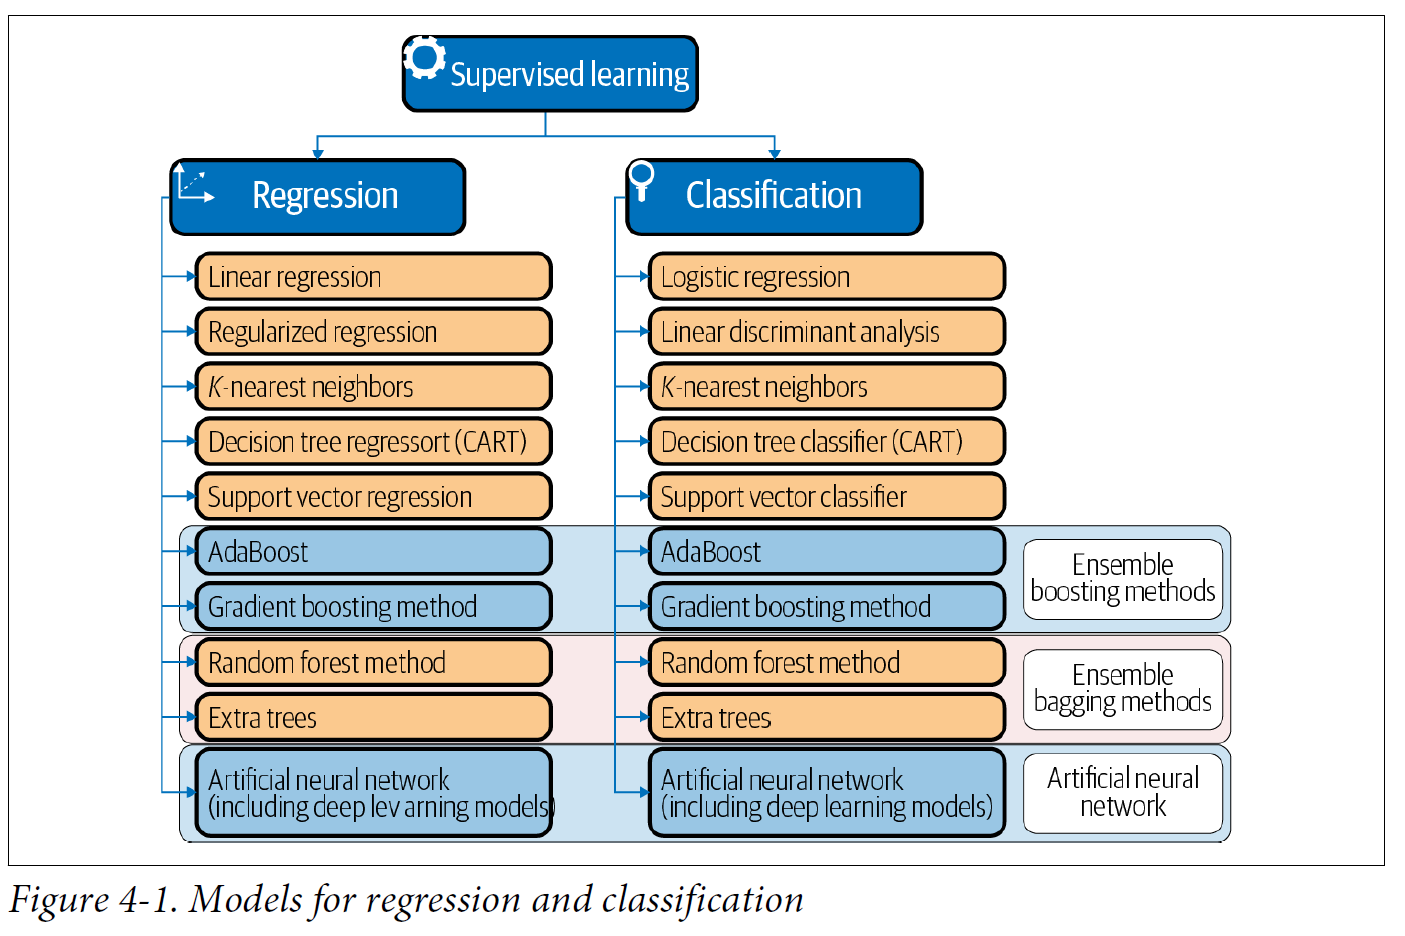

### Classification Problems Concepts

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
#matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### MNIST Example Dataset

- The MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.
- Each image is labeled with the digit it represents.
- This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever
people come up with a new classification algorithm, they are curious to see how it will perform on MNIST.

- Scikit-Learn provides many helper functions to download popular datasets.
- MNIST is one of them. The following code fetches the MNIST dataset:

In [5]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data.iloc[:60000] = mnist.data.iloc[reorder_train]
    mnist.target.iloc[:60000] = mnist.target.iloc[reorder_train]
    mnist.data.iloc[60000:] = mnist.data.iloc[reorder_test + 60000]
    mnist.target.iloc[60000:] = mnist.target.iloc[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

C:\Users\310\AppData\Local\Temp\ipykernel_14400\1725251432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnist.data.iloc[:60000] = mnist.data.iloc[reorder_train]
C:\Users\310\AppData\Local\Temp\ipykernel_14400\1725251432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnist.data.iloc[60000:] = mnist.data.iloc[reorder_test + 60000]


(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
        pixel1

In [6]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [7]:
print(mnist.data.iloc[0].describe())

count    784.000000
mean      39.661990
std       83.940709
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64


- There are 70,000 images, and each image has 784 features.
- This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).
- Let’s take a peek at one digit from the dataset

In [8]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape
28 ** 2

(70000, 784)

(70000,)

784

In [9]:
def plot_digit(data):
    image = data.values.reshape(28, 28);
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest");
    plt.axis("off");

y= 2


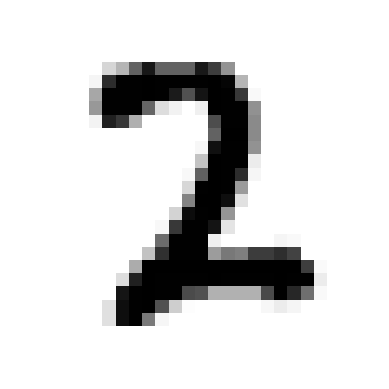

In [10]:
some_digit = X.iloc[15902];
plot_digit(some_digit)
print("y=", y.iloc[15902])

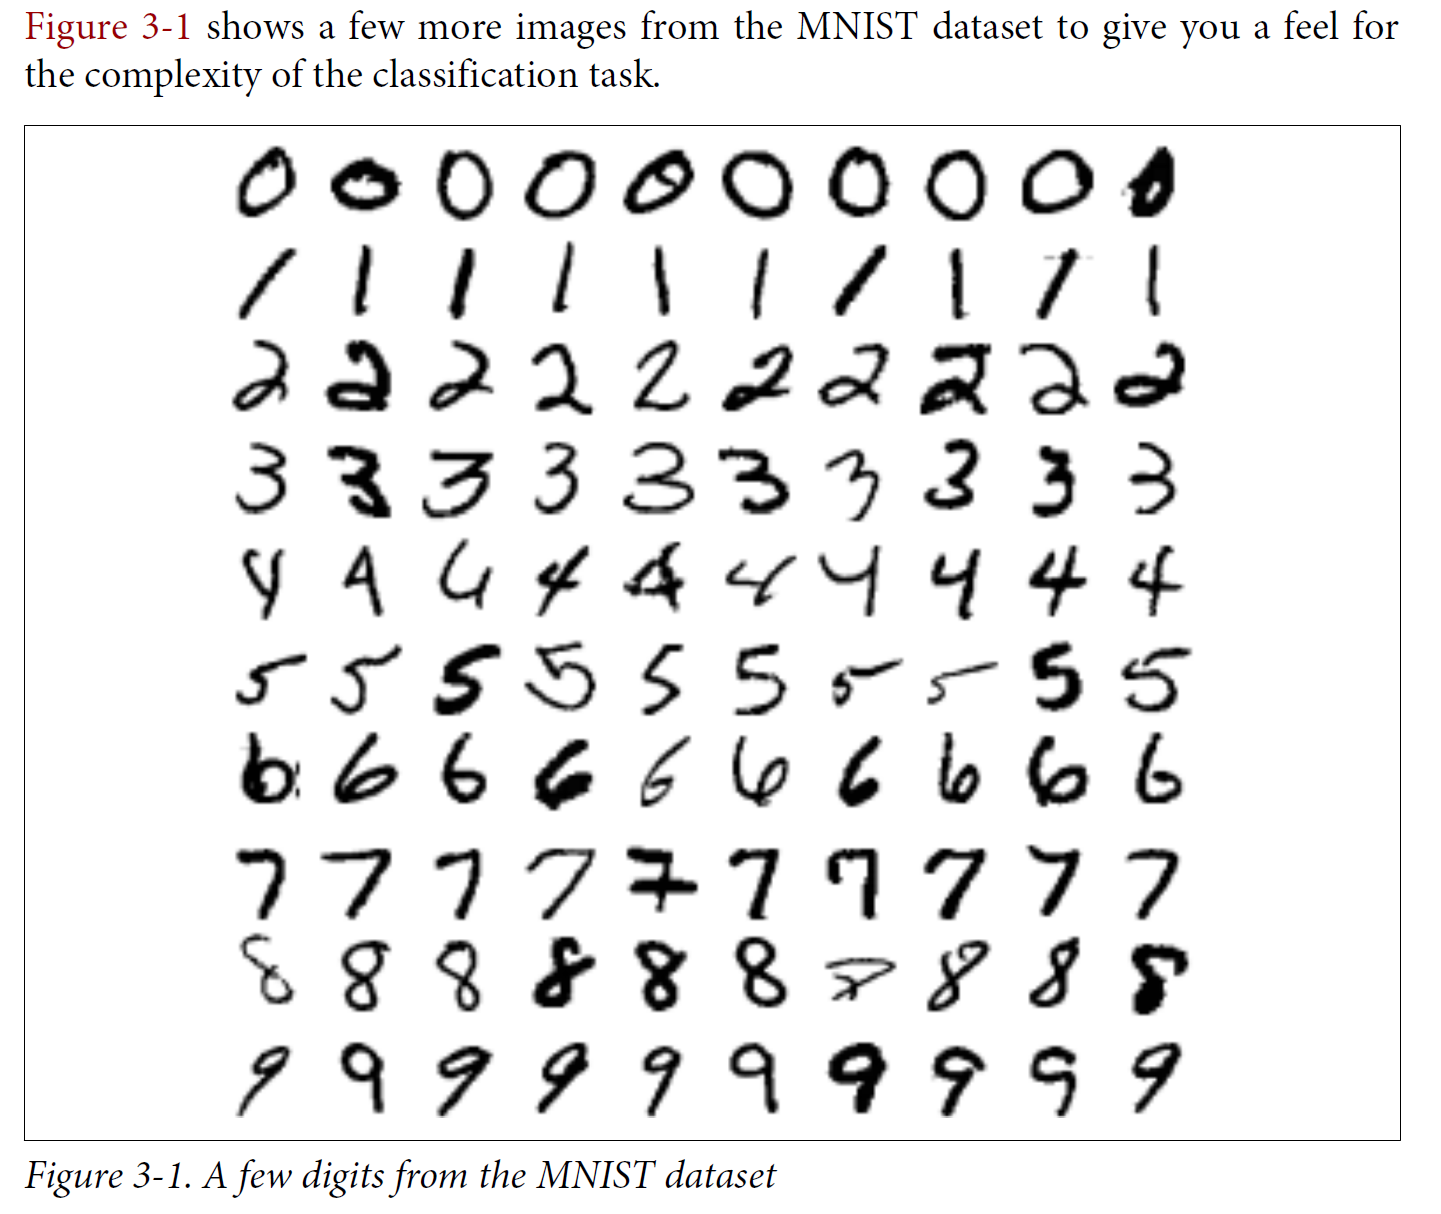

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [11]:
X_train, X_test, y_train, y_test = X[:60000].values, X[60000:].values, y[:60000].values, y[60000:].values

- Shuffle the training set; this will guarantee that all cross-validation folds will
be similar (you don’t want one fold to be missing some digits).
- Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform
poorly if they get many similar instances in a row. Shuffling the dataset ensures that
this won’t happen

In [12]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

- Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5.
- This “5-detector” will be an example of a **binary classifier**, capable of distinguishing between just two classes, 5 and not-5.
- Let’s create the target vectors for this classification task:

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

We will train a **Stochastic Gradient Descent** (SGD) classifier, using Scikit-Learn’s `SGDClassifier` class.
- This classifier has the advantage of being capable of handling very large datasets efficiently.
- This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning)
- The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=500, tol=0.0000005, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=500, random_state=42, tol=5e-07)

In [15]:
# Works ok for our example
print("Is this digit a 5?", sgd_clf.predict([X_test[20]])[0])
print("This digit is", y_test[60])

Is this digit a 5? False
This digit is 0


### Performance Measures

- Evaluating a classifier is often significantly trickier than evaluating a regressor
- There are many performance measures available

Let’s use the `cross_val_score()` function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds.

- Remember that K-fold crossvalidation
means splitting the training set into K-folds (in this case, three), then making
predictions and evaluating them on each fold using a model trained on the
remaining folds

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")#.mean()

array([0.9665    , 0.96433333, 0.962     , 0.95241667, 0.95583333])

Accuracy - % time i am right

Accuracy is very bad measure of perfomance if data is imbalance. If i have 99.999% of 0 labales in my validation set data my accuracy will be 99.999% if model sets all predicted labels to 0.

- Above 95% **accuracy**! (ratio of correct predictions) on all cross-validation folds?

- Before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:


In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")#.mean()


array([0.907     , 0.90958333, 0.90633333, 0.91325   , 0.91208333])

- It has over 90% accuracy!
- This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90\% of the time. Beats Nostradamus.
- This demonstrates why **accuracy is generally not the preferred performance measure for classifiers**, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others)

### Confusion Matrix

- A much better way to evaluate the performance of a classifier is to look at the confusion
matrix.
- The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.
- To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch).
- Instead, you can use the `cross_val_predict()` function, which performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.
- This means that you get a clean prediction for each
instance in the training set

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

Now you are ready to get the confusion matrix using the `confusion_matrix()` function.

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)   # true labels, predictions

array([[53966,   613],
       [ 1774,  3647]], dtype=int64)

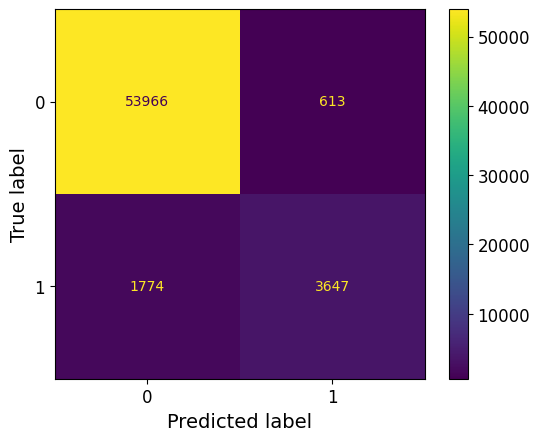

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_train_5, y_pred=y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

plt.show();

In [22]:
import pandas as pd

def decorate_confusion_matrix(array):
    df = pd.DataFrame(array, columns=['negative', 'positive'],
                      index= ['negative', 'positive'])
    df.columns.name = 'predicted class'
    df.index.name = 'actual class'
    return df


print(decorate_confusion_matrix(confusion_matrix(y_train_5, y_train_pred)))

predicted class  negative  positive
actual class                       
negative            53966       613
positive             1774      3647


- Each row in a confusion matrix represents an *actual* class, while each column represents
a *predicted* class.
    - The first row of this matrix considers non-5 images (the negative class): 53,272 of them were correctly classified as non-5s (they are called *true negatives*), while the remaining 1,307 were wrongly classified as 5s (*false positives*).
    - The second row considers the images of 5s (the positive class): 1,077 were wrongly
classified as non-5s (*false negatives*), while the remaining 4,344 were correctly classified
as 5s (*true positives*).
- A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal

In [23]:
accuracy = (53093 + 4097) / (53093 + 4097 + 1486 + 1324)
accuracy * 100

95.31666666666668

### Scalar metrics

$precision = \frac{TP}{TP + FP}$  

- A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct
- This would not be very useful since the classifier would ignore all but one positive instance. 
- So precision is typically used along with another metric named recall, also called sensitivity or true positive rate
(TPR): this is the ratio of positive instances that are correctly detected by the classifier

$recall = \frac{TP}{TP + FN}$

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) * 100   # true label, predicted
recall_score(y_train_5, y_train_pred) * 100

85.61032863849766

67.27541044087808

Now your 5-detector does not look as shiny as it did when you looked at its accuracy.
When it claims an image represents a 5, it is correct only 77% of the time. Moreover,
it only detects 80% of the 5s

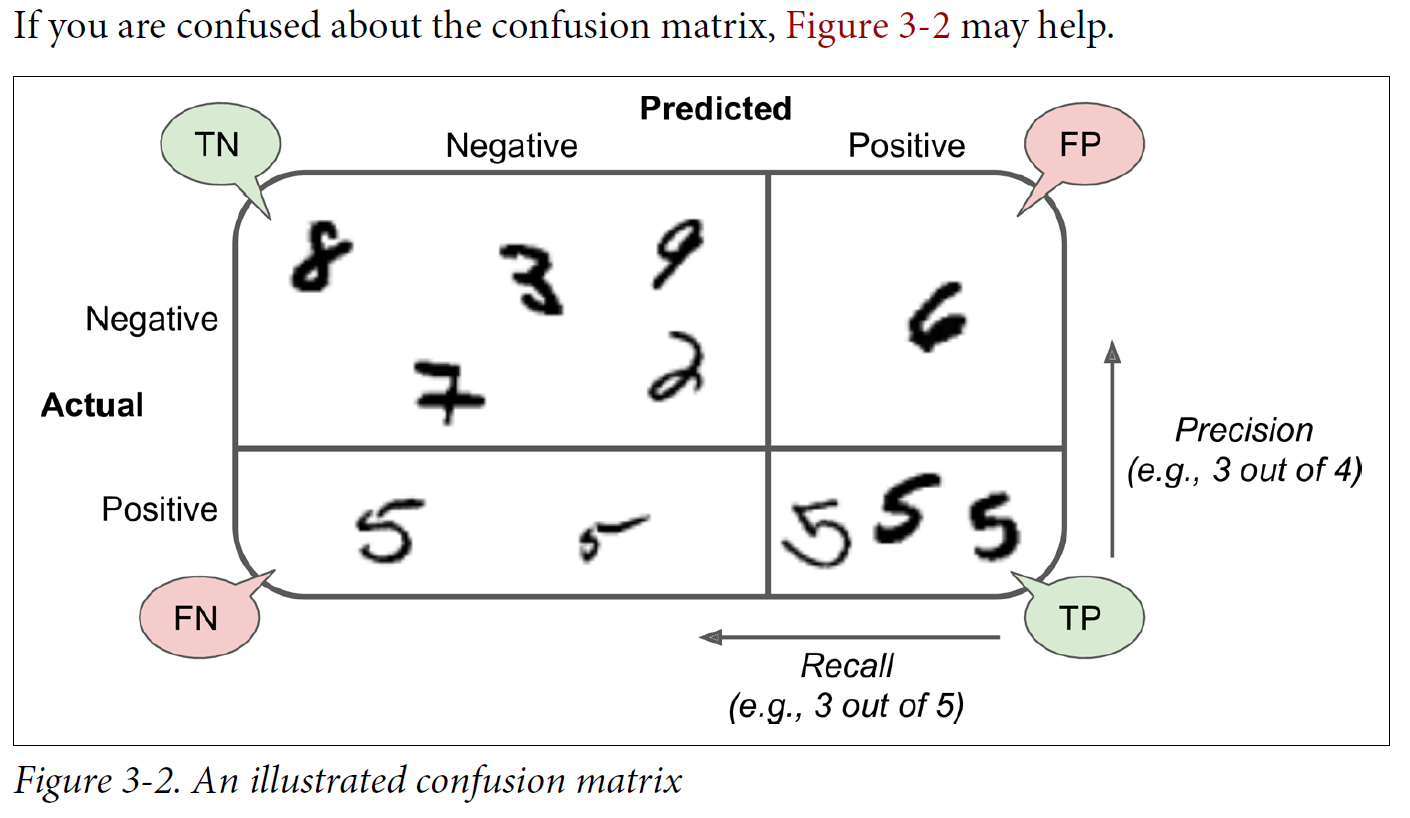

- It is often convenient to combine precision and recall into a single metric called the **F1 score**
    - In particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall
    - Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
    - As a result, the classifier will only get a high F1 score if both recall and precision are high
    
$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{TP}{TP + \frac{FP+FN}{2}}$

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7534345625451916

- The F1 score favors classifiers that have similar precision and recall.
- This is not always what you want:  in some contexts you mostly care about precision, and in other contexts
you really care about recall. 
- For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product 
- On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

- Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the **precision/recall tradeoff**.

- The SGD classifier computes a score for each instance based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

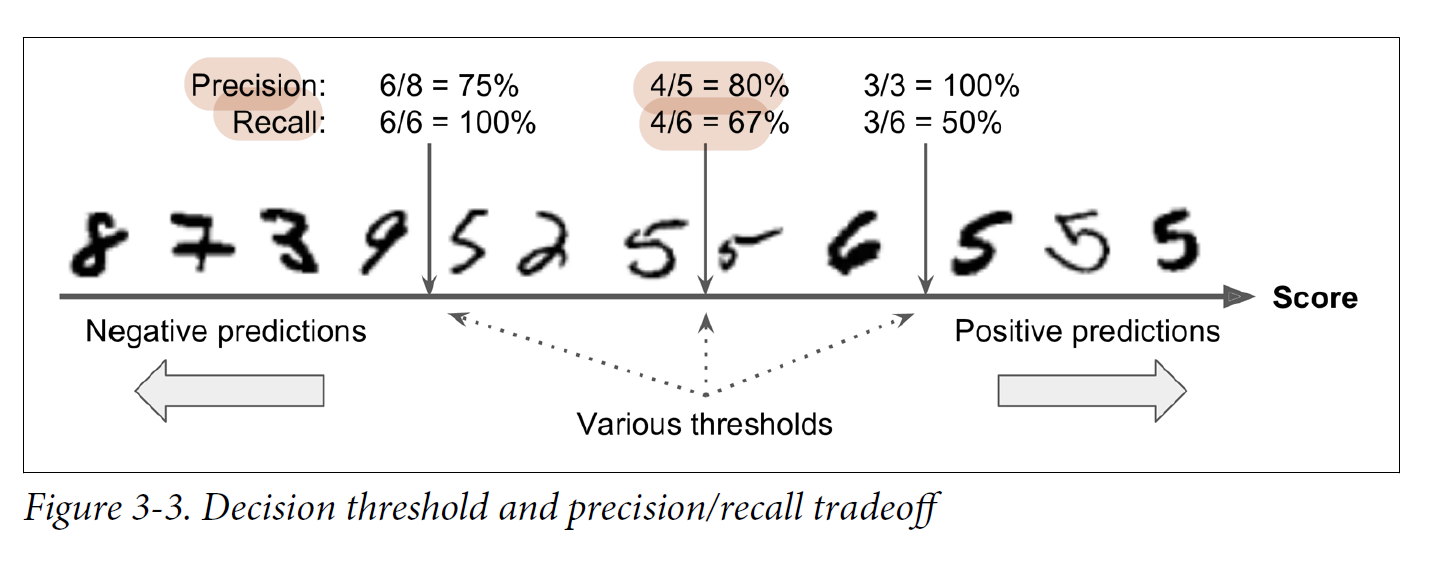

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
`predict()` method, you can call its `decision_function()` method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-13510.01296421])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred[0]

False

In [28]:
threshold = -1000000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred[0]

True

- Now how do you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the function `cross_val_predict()` again, but this time specifying that you want it to return decision scores instead of predictions:

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds
using the `precision_recall_curve()` function:

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

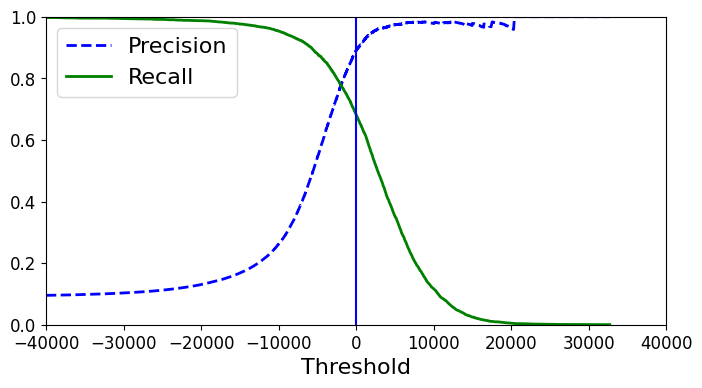

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);
plt.xlim([-40000, 40000]);
plt.axvline(x = 0, color = 'b')
#save_fig("precision_recall_vs_threshold_plot");
plt.show();

Now you can simply select the threshold value that gives you the best precision/recall
tradeoff for your task. Another way to select a good precision/recall tradeoff is to plot
precision directly against recall

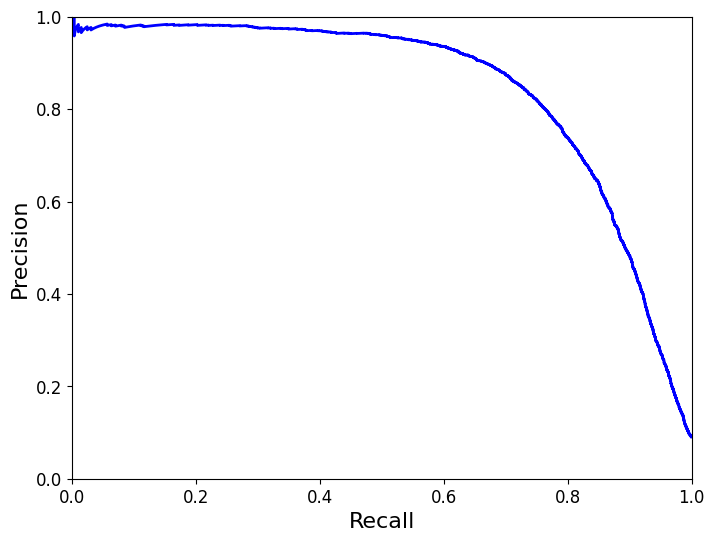

In [32]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
#save_fig("precision_vs_recall_plot");
plt.show();

So let’s suppose you decide to aim for 90% precision.

You look up the first plot (zooming in a bit) and find that you need to use a threshold of about 100,000.

To make predictions (on the training set for now), instead of calling the classifier’s predict()
method, you can just run this code

- To be more precise you can search for the lowest threshold that gives you at least 90% precision:

In [33]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816
threshold_90_precision

269.6699492125126

In [34]:
def precision_recall_by_threshold(threshold):
    y_train_pred = (y_scores > threshold).astype(np.int16)
    precision = precision_score(y_train_5, y_train_pred)
    recall = recall_score(y_train_5, y_train_pred)
    print(f"Precision={precision:.3f}, Recall={recall:.3f}")
          
precision_recall_by_threshold(threshold_90_precision)

Precision=0.900, Recall=0.668


### The ROC Curve

- The **receiver operating characteristic** (ROC) curve is another common tool used with
binary classifiers.
- It is very similar to the precision/recall curve, but instead of plotting
precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate.
- The FPR is the fraction of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.
The TNR is also called *specificity*. 
- Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

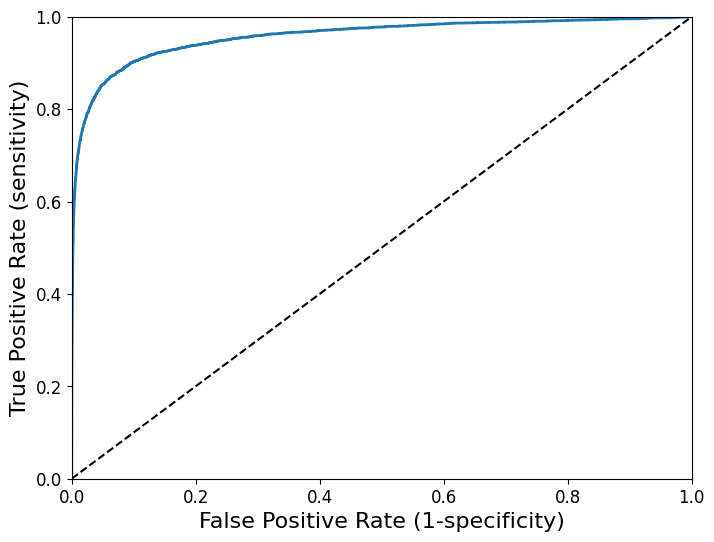

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label);
    plt.plot([0, 1], [0, 1], 'k--');
    plt.axis([0, 1, 0, 1]);
    plt.xlabel('False Positive Rate (1-specificity)', fontsize=16);
    plt.ylabel('True Positive Rate (sensitivity)', fontsize=16);

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr);
#save_fig("roc_curve_plot");
plt.show();

- Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces.
- The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible
- One way to compare classifiers is to measure the area under the curve (AUC). A perfect
classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5

In [37]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9577210519742373

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. 

- As a rule of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise.

- For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright
corner).

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC
score to the SGDClassifier.

- First, you need to get scores for each instance in the training set. But the RandomForestClassifier class does not have a `decision_function()` method.
- Instead it has a `predict_proba()` method.
- Scikit-Learn classifiers generally have one or the other. 
- The predict_proba() method returns an array containing a row per instance and a column
per class, each containing the probability that the given instance belongs to the
given class 

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [39]:
import pandas as pd
pd.Series(y_probas_forest[:,-1]).describe()

count    60000.000000
mean         0.091368
std          0.234829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

In [40]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

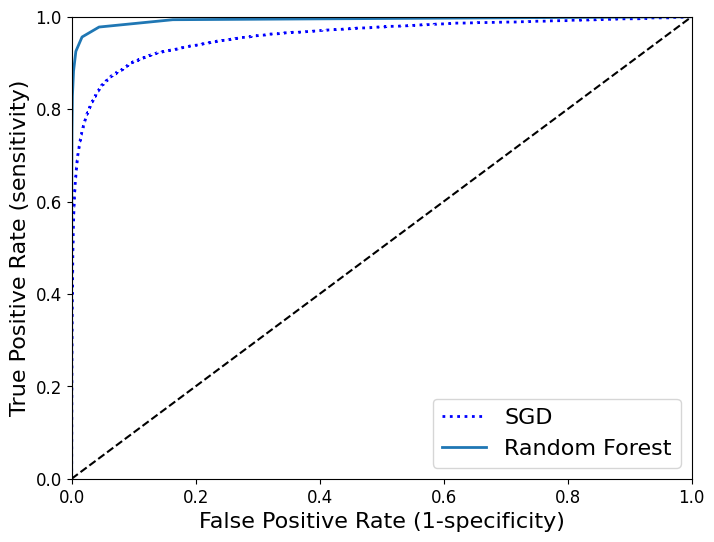

In [41]:
plt.figure(figsize=(8, 6));
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.legend(loc="lower right", fontsize=16);

#save_fig("roc_curve_comparison_plot");
plt.show();

The RandomForestClassifier’s ROC curve looks much
better than the SGDClassifier’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [75]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)
recall_score(y_train_5, y_train_pred_forest)

0.9852973447443494

0.8282604685482383

## Multiclass Classification

- Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes

- Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
capable of handling multiple classes directly.
- Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.
- However, there are various strategies that you can use to perform multiclass classification using multiple
binary classifiers.

1) one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the **one-versus-all (OvA)** strategy (also called one-versus-the-rest).

2) another strategy is to train a binary classifier for every pair of digits: one to distinguish
0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the **one-versus-one (OvO) strategy**.
- If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels.
- The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.
- Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred

- Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO).

In [41]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

array([2], dtype=int8)

In [42]:
# Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, 
# and selected the class with the highest score
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores
np.argmax(some_digit_scores)
sgd_clf.classes_

array([[-480792.91707912, -227655.53171795,  201931.81857862,
        -156952.10482037, -400301.6965737 , -382603.7230817 ,
        -534832.64472441, -194993.63723418, -322261.35990032,
        -657605.77112231]])

2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the `OneVsOneClassifier` or `OneVsRestClassifier` classes. Simply create an instance
and pass a binary classifier to its constructor.

In [43]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

OneVsOneClassifier(estimator=SGDClassifier(max_iter=5, random_state=42,
                                           tol=-inf))

array([3], dtype=int8)

In [44]:
len(ovo_clf.estimators_)

45

Training a RandomForestClassifier is just as easy:

In [45]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

RandomForestClassifier(n_estimators=10, random_state=42)

array([2], dtype=int8)

- This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes.
- You can call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class:

In [46]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0.1, 0. ]])

Now of course you want to evaluate these classifiers. As usual, you want to use crossvalidation.
Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score()
function:

In [73]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

- You can still do much better. For example, simply scaling the inputs increases accuracy above
90\%:

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9091 , 0.90955, 0.9062 ])

## Error Analysis

- Of course, if this were a real project, you would follow the steps in your Machine Learning project checklist
- We will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.
- First, you can look at the confusion matrix. You need to make predictions using the
cross_val_predict() function, then call the confusion_matrix() function,

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5728,    3,   18,   10,   11,   48,   54,   10,   38,    3],
       [   2, 6472,   43,   27,    6,   41,    6,    9,  124,   12],
       [  59,   39, 5300,  103,   96,   24,   99,   57,  167,   14],
       [  60,   42,  133, 5357,    4,  213,   35,   52,  135,  100],
       [  14,   28,   33,    9, 5366,    8,   56,   33,   88,  207],
       [  68,   49,   30,  197,   76, 4566,  118,   33,  190,   94],
       [  35,   28,   31,    1,   47,   86, 5639,    9,   42,    0],
       [  22,   20,   70,   29,   65,   11,    6, 5789,   18,  235],
       [  55,  158,   63,  157,   11,  155,   61,   24, 5022,  145],
       [  38,   37,   30,   85,  185,   24,    2,  216,   74, 5258]],
      dtype=int64)

- It’s often more convenient to look at an image representation of the confusion matrix, 
using Matplotlib’s `matshow()` function:


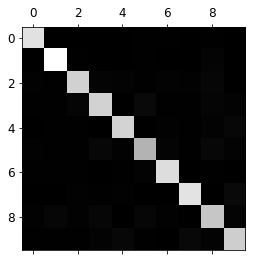

In [76]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


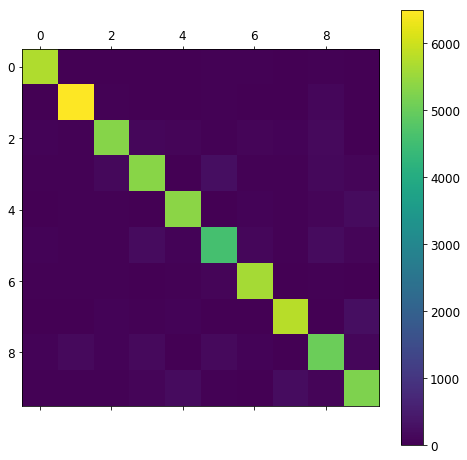

In [77]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    

plot_confusion_matrix(conf_mx)

- Let’s focus the plot on the errors. First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare error
rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):

<Figure size 1728x1728 with 0 Axes>

<Figure size 1728x1728 with 0 Axes>

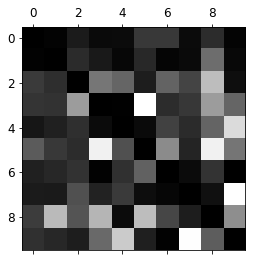

In [78]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums 
np.fill_diagonal(norm_conf_mx, 0)
plt.figure(figsize=(24,24))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as
8s or 9s.
- Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s
and 9s are often confused with other digits.
- Conversely, some rows are pretty dark, such as row 1: this means that most 1s are classified correctly (a few are confused with 8s, but that’s about it).
- Notice that the errors are not perfectly symmetrical; for
example, there are more 5s misclassified as 8s than the reverse

- Analyzing the confusion matrix can often give you insights on ways to improve your
classifier.
- Looking at this plot, it seems that your efforts should be spent on improving
classification of 8s and 9s, as well as fixing the specific 3/5 confusion.
- For example,
you could try to gather more training data for these digits. Or you could engineer
new features that would help the classifier—for example, writing an algorithm to
count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you
could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make
some patterns stand out more, such as closed loops.